In [1]:
%matplotlib inline


# Gaussian Mixture Model Ellipsoids


Plot the confidence ellipsoids of a mixture of two Gaussians
obtained with Expectation Maximisation (``GaussianMixture`` class) and
Variational Inference (``BayesianGaussianMixture`` class models with
a Dirichlet process prior).

Both models have access to five components with which to fit the data. Note
that the Expectation Maximisation model will necessarily use all five
components while the Variational Inference model will effectively only use as
many as are needed for a good fit. Here we can see that the Expectation
Maximisation model splits some components arbitrarily, because it is trying to
fit too many components, while the Dirichlet Process model adapts it number of
state automatically.

This example doesn't show it, as we're in a low-dimensional space, but
another advantage of the Dirichlet process model is that it can fit
full covariance matrices effectively even when there are less examples
per cluster than there are dimensions in the data, due to
regularization properties of the inference algorithm.


In [9]:
data = pd.read_csv("C:\\Users\\Peter\\Desktop\\Classes\\INF 552\\Homework 2\\clusters.csv",dtype={'High': np.float64, 'Low': np.float64})

data = data.apply(pd.to_numeric, errors='coerce')
print(data.head())
np.array(data)

     pointx    pointy
0 -1.861331 -2.991683
1 -2.170092 -3.292318
2 -1.014081  0.385795
3 -2.912943 -2.579539
4  0.035721 -0.799698


array([[-1.86133124e+00, -2.99168277e+00],
       [-2.17009237e+00, -3.29231778e+00],
       [-1.01408097e+00,  3.85794990e-01],
       [-2.91294254e+00, -2.57953917e+00],
       [ 3.57207350e-02, -7.99697919e-01],
       [ 2.48350942e+00,  1.55080609e+00],
       [-5.57616974e-01,  1.84429997e+00],
       [ 1.10842255e+00,  3.08907169e+00],
       [ 3.62326849e-01, -2.01912453e+00],
       [ 2.70971410e+00,  1.71341276e+00],
       [-3.54004402e-01,  6.50573081e-01],
       [ 6.55103152e-01,  2.50487751e+00],
       [ 5.51797714e+00,  4.40317168e-01],
       [ 2.56305662e+00,  1.63039337e+00],
       [-2.08813668e+00,  2.27884440e+00],
       [ 2.50393116e+00, -8.23421912e-01],
       [-2.06663381e+00, -9.22130196e-01],
       [ 2.21526360e-02, -2.65809723e+00],
       [ 6.47043958e-01, -1.75000364e-01],
       [ 1.94538595e+00,  7.10891971e-01],
       [-8.88304367e-01, -1.48627746e+00],
       [ 1.20268655e+00,  1.44061369e-01],
       [ 3.95725154e+00, -7.12806721e-01],
       [-4.

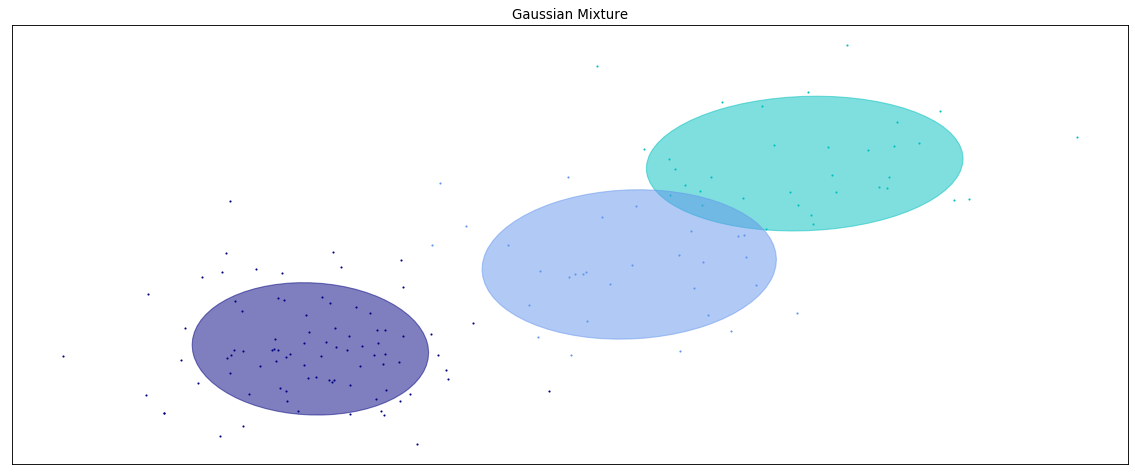

In [19]:
import itertools
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#     plt.xlim(-9., 5.)
#     plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Number of samples per component
n_samples = 300

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.array(data)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
# Fit a Gaussian mixture with EM using three components
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

plt.show()

In [16]:
gmm.covariances_

array([[[ 1.23856256, -0.09316563],
        [-0.09316563,  2.02291629]],

       [[ 2.2216601 ,  0.15446244],
        [ 0.15446244,  2.094973  ]],

       [[ 1.91930032,  0.14344635],
        [ 0.14344635,  2.57669337]]])

In [20]:
fig = figure(title="clusters Data", x_axis_label="point x", y_axis_label="point y")
fig.scatter(x=data.pointx, y=data.pointy)
show(fig);